In [1]:
import fitz
import io
from PIL import Image
import dotenv 
import google.generativeai as genai

In [6]:
# file = "./files/first_chapter.pdf"
file = "./files/hesc103.pdf"
# file = "./files/two_chapters.pdf"
# file = r'files/Craig Larman - Applying UML and Patterns_ An Introduction to Object-Oriented Analysis and Design and Iterative Development (3rd Edition)-Prentice Hall (2004).pdf'
# file = 'files/Decision Support and Business Intelligence Systems 9th Ed Efraim Turban.pdf'
page_start = 2
page_end = 3

pdf_file = fitz.open(file)

topic_name = 'Coal'

# Loop through the specified pages
for page_index in range(page_start - 1, page_end):
    try:
        page = pdf_file[page_index]
        image_list = page.get_images(full=True)

        if image_list:
            print(f"[+] Found a total of {len(image_list)} images in page {page_index + 1}")

        for image_index, img in enumerate(image_list, start=1):
            xref = img[0]
            base_image = pdf_file.extract_image(xref)
            image_bytes = base_image["image"]
            image_ext = base_image["ext"]

            # Open the image
            image = Image.open(io.BytesIO(image_bytes))
            # Convert the image to RGB mode if not already in it
            if image.mode in ("RGBA", "P"):
                image = image.convert("RGB")

            image.save(f"image{page_index + 1}_{image_index}.jpeg", "JPEG")
            
    except Exception as e:
        print(f"[-] Error processing page {page_index + 1}: {e}")

[+] Found a total of 4 images in page 2
[-] Error processing page 2: broken data stream when reading image file
[+] Found a total of 4 images in page 3
[-] Error processing page 3: broken data stream when reading image file


In [3]:
from pdf2image import convert_from_path

pil_images = convert_from_path(file, first_page=page_start, last_page=page_end)

In [ ]:
# import base64
# from io import BytesIO
# from IPython.display import display, HTML
# for image in pil_images:

#     # Convert the image to a base64 string
#     buffered = BytesIO()
#     image.save(buffered, format="PNG")
#     img_str = base64.b64encode(buffered.getvalue()).decode("utf-8")
    
#     # Create an HTML image tag
#     img_html = f'<img src="data:image/png;base64,{img_str}" alt="PIL image">'
    
#     # Display the image
#     display(HTML(img_html))

In [4]:
api_key = dotenv.get_key('.env', key_to_get='GEMINI_API_KEY')

#Configure API key
genai.configure(api_key=api_key)

In [5]:
from google.generativeai.types import HarmCategory, HarmBlockThreshold

# gen_config = genai.GenerationConfig(
#     temperature=0.5,
# )


model = genai.GenerativeModel(
    model_name='gemini-pro-vision',
    safety_settings={
        HarmCategory.HARM_CATEGORY_HATE_SPEECH: HarmBlockThreshold.BLOCK_NONE,
        HarmCategory.HARM_CATEGORY_HARASSMENT: HarmBlockThreshold.BLOCK_NONE,
        HarmCategory.HARM_CATEGORY_DANGEROUS_CONTENT: HarmBlockThreshold.BLOCK_NONE,
    }
    # generation_config=gen_config
)

intermediate_output = ""

cur_page = page_start


for img in pil_images:
    response = model.generate_content([
        f"""
        ###Instruction###
        You are an expert Summarizer and great content creator. Given a page in the pdf, summarize the content and also extract information from the images. Include images if it is necessary. The main topic to summarize is  {topic_name}. The audience is a general person who wants to learn the information from the PDF in a easy way. Return the answer in a natural, human-like manner. You must follow the following rules:
        1. All the text needs to be enclosed inside the parentheses of Markdown() and should be under double qoutes. You must add the word Markdown before the parentheses. Headings needs to be preceded by # symbol. Use one # symbol for main heading, two # symbol for subheading and three # heading for sub-subheading. Enclose the headings in markdown text.
        2. Images needs to be enclosed with Image(filename=''). The file name of the image is image{{page_num}}_{{image_index}}.jpeg Also, page_num={cur_page} and image_index represents the index of the image within the page. The first image will have index 1 and the second image in the page will have index 2.
            """, img]
    )
    print(response.text)
    intermediate_output += response.text
    cur_page += 1

 Markdown("Figure 1: Top attack vectors")
Markdown("Image(filename='image3_1.jpeg')")
Markdown("In the first half of 2023, there has been a rise in the number of attacks that use Remote Desktop Protocol (RDP) as the initial infection vector. In the second half of the year, there was an increase in the number of attacks that used phishing as the initial infection vector.")

Markdown("Figure 2: Ransomware and Extortion Breaches Over Time")
Markdown("Image(filename='image3_2.jpeg')")
Markdown("In 2020, there was a rise in ransomware attacks, which was followed by a decrease in 2021. In 2022, there was a slight increase in ransomware attacks, and in 2023, there was a significant increase in ransomware attacks.")
 # Markdown("Summary of headings")
## Markdown("Types of incidents")
### Markdown("Human element")
86% of breaches involved a human element. This includes social engineering, phishing, and other attacks that rely on tricking people into giving up their credentials or compromising t

In [21]:
response

response:
GenerateContentResponse(
    done=True,
    iterator=None,
    result=protos.GenerateContentResponse({
      "candidates": [
        {
          "finish_reason": "RECITATION",
          "index": 0
        }
      ]
    }),
)

In [6]:
intermediate_output

' Markdown("Figure 1: Top attack vectors")\nMarkdown("Image(filename=\'image3_1.jpeg\')")\nMarkdown("In the first half of 2023, there has been a rise in the number of attacks that use Remote Desktop Protocol (RDP) as the initial infection vector. In the second half of the year, there was an increase in the number of attacks that used phishing as the initial infection vector.")\n\nMarkdown("Figure 2: Ransomware and Extortion Breaches Over Time")\nMarkdown("Image(filename=\'image3_2.jpeg\')")\nMarkdown("In 2020, there was a rise in ransomware attacks, which was followed by a decrease in 2021. In 2022, there was a slight increase in ransomware attacks, and in 2023, there was a significant increase in ransomware attacks.") # Markdown("Summary of headings")\n## Markdown("Types of incidents")\n### Markdown("Human element")\n86% of breaches involved a human element. This includes social engineering, phishing, and other attacks that rely on tricking people into giving up their credentials or c

In [7]:
lines = intermediate_output.split('\n')

In [8]:
from IPython.display import display, Image, Markdown
for line in lines:
    if line != '':
        display(eval(line))

Figure 1: Top attack vectors

Image(filename='image3_1.jpeg')

In the first half of 2023, there has been a rise in the number of attacks that use Remote Desktop Protocol (RDP) as the initial infection vector. In the second half of the year, there was an increase in the number of attacks that used phishing as the initial infection vector.

Figure 2: Ransomware and Extortion Breaches Over Time

Image(filename='image3_2.jpeg')

In 2020, there was a rise in ransomware attacks, which was followed by a decrease in 2021. In 2022, there was a slight increase in ransomware attacks, and in 2023, there was a significant increase in ransomware attacks.

SyntaxError: invalid syntax (<string>, line 1)

# Main Heading

This is the introductory paragraph. It provides an overview of the document.
## Subheading 1

This is the first subheading. Here is a paragraph under the first subheading.

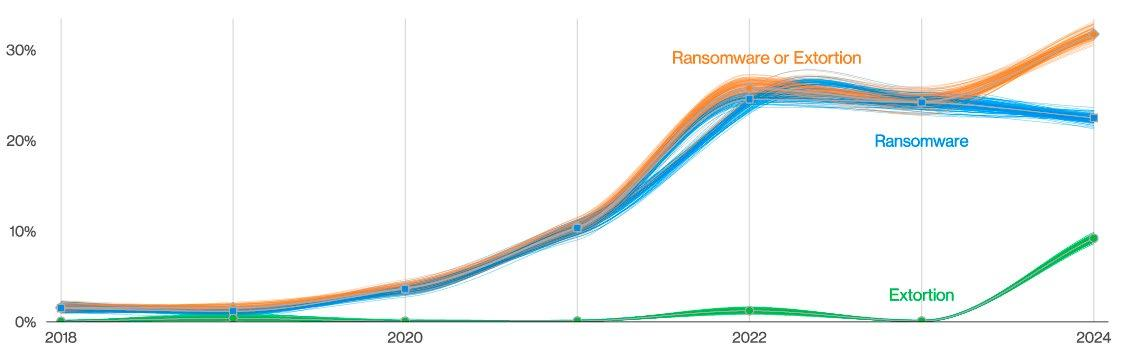


Here is another paragraph under the first subheading, after the image.

### Subheading 1.1

This is a sub-subheading under the first subheading. Here is some text under this sub-subheading.

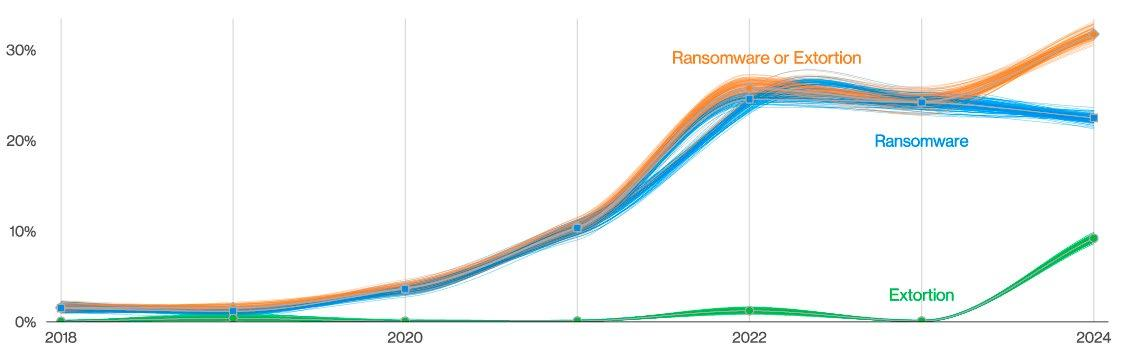

## Subheading 2

This is the second subheading. It starts a new section of the document.

Here is a paragraph under the second subheading. You can include multiple paragraphs and images in each section.

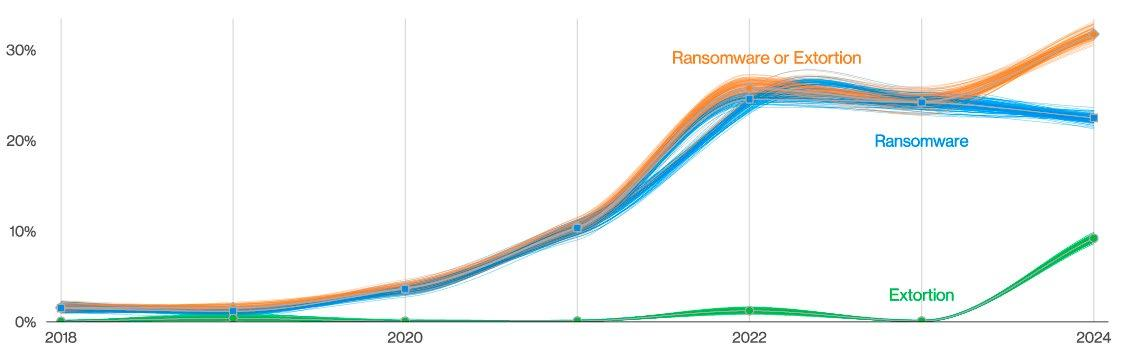

In [66]:
from IPython.display import display, Image, Markdown

# Main Heading
display(Markdown("# Main Heading\n\nThis is the introductory paragraph. It provides an overview of the document.\n## Subheading 1\n\nThis is the first subheading. Here is a paragraph under the first subheading."))
display(Image(filename='image3_1.jpeg'))
display(Markdown("\nHere is another paragraph under the first subheading, after the image."))

# Subheading 1.1
display(Markdown("### Subheading 1.1\n\nThis is a sub-subheading under the first subheading. Here is some text under this sub-subheading."))
display(Image(filename='image3_1.jpeg'))

# Subheading 2
display(Markdown("## Subheading 2\n\nThis is the second subheading. It starts a new section of the document."))
display(Markdown("Here is a paragraph under the second subheading. You can include multiple paragraphs and images in each section."))
display(Image(filename='image3_1.jpeg'))


## Summary of findings

### Initial entry points

The initial entry points for breaches are web applications. This is due to an increase in vulnerabilities exploited by attackers in order to initiate a breach.

In fact, the exploitation of vulnerabilities in initiating a breach increased almost three times from the previous year.

These findings come as no surprise, as many have followed the zero-day effect of MOVEit and similar vulnerabilities. The most prominent actors leverage zero-day vulnerabilities for ransomware and extortion attacks.

### Ransomware and Extortion

Ransomware and extortion breaches are growing. Roughly one-third of all breaches include either ransomware or an extortion technique. This makes ransomware and extortion a component of 9% of all breaches.

The shift away from traditional techniques resulted in a small decline in ransomware breaches, which are now at 23%. However, the combined growth of ransomware and extortion makes them a strong threat, accounting for 32% of all breaches.  Ransomware was a top threat in 92% of industries.

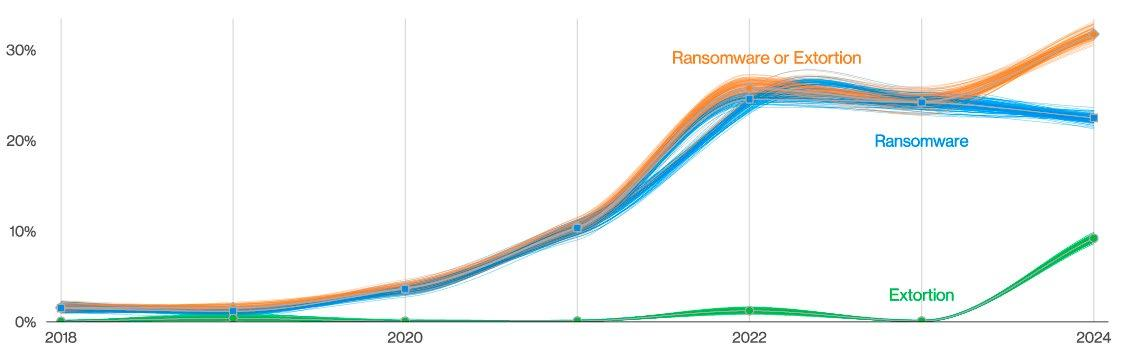

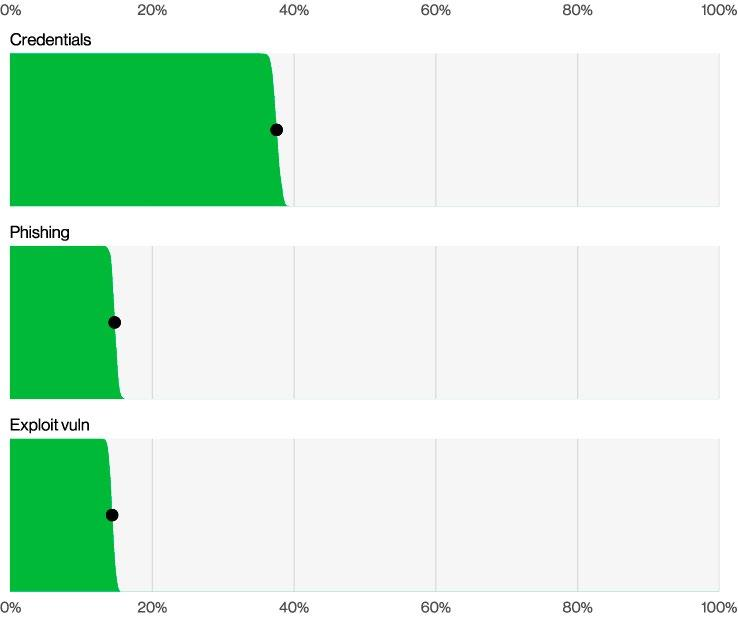

In [36]:
display(Markdown("## Summary of findings"))

display(Markdown("### Initial entry points"))
display(Markdown("The initial entry points for breaches are web applications. This is due to an increase in vulnerabilities exploited by attackers in order to initiate a breach.") )
display(Markdown("In fact, the exploitation of vulnerabilities in initiating a breach increased almost three times from the previous year.") )
display(Markdown("These findings come as no surprise, as many have followed the zero-day effect of MOVEit and similar vulnerabilities. The most prominent actors leverage zero-day vulnerabilities for ransomware and extortion attacks.") )

display(Markdown("### Ransomware and Extortion"))
display(Markdown("Ransomware and extortion breaches are growing. Roughly one-third of all breaches include either ransomware or an extortion technique. This makes ransomware and extortion a component of 9% of all breaches.") )
display(Markdown("The shift away from traditional techniques resulted in a small decline in ransomware breaches, which are now at 23%. However, the combined growth of ransomware and extortion makes them a strong threat, accounting for 32% of all breaches.  Ransomware was a top threat in 92% of industries."))

display(Image(filename='files\images\image3_1.jpeg'))
display(Image(filename='files\images\image3_2.jpeg'))